In [1]:
import data
import algo
import plot
import numpy as np

#  Portfolio Selection

Paper: Logarithmic Regret Algorithms for Online Convex Optimization

$W_T = W_{T-1} r_{T-1}^T x_{T-1} = W_1 \prod_t r_t^T x^t$

$r_t(i) = \frac{\text{price of stock i at } t}{\text{price of stock i at } t-1}$

$f_t(x) = \log\left( r_t^T x \right)$

$f_t$ are rewards and not losses, so the regret defined as:

$\text{Regret}_T = \max_{x \in \Delta_n} \sum_t f_t(x) - \sum_t f_t(x_t)$

We'll use the following no-regret algorithms:

oga - online gradient descent

ons - online newton step



## Test unit 

Example from the Elad's book

stock 1 $= \left( 1, 2, 1, ... \right)$

$r_t(1) = \left( 2, 0.5, 2, 0.5, ... \right)$

stock 2 $= \left( 2, 1, 2, ... \right)$

$r_t(2) = \left( 0.5, 2, 0.5, 2, ... \right)$

$p_{opt} = \left( 0.5, 0.5 \right)$

ons: 100%|██████████| 999/999 [00:06<00:00, 153.68it/s]


final x_oga =  [[0.50477193]
 [0.49522807]]
final x_ons =  [[0.52697111]
 [0.47302889]]
should be [[0.5]
 [0.5]]


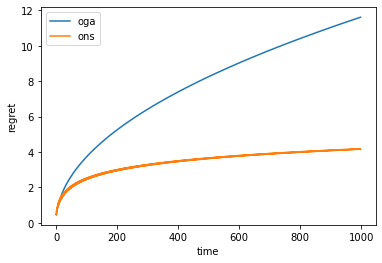

In [4]:
def test_unit():
    T=1000
    X = data.test_data(T)

    bh_reward = algo.hindsight(X)
    x_oga, oga_reward = algo.oga(X)
    x_ons, ons_reward = algo.ons(X)

    print("final x_oga = ",x_oga)
    print("final x_ons = ",x_ons)
    print("should be", 0.5 * np.ones([2,1]))

    algs_reward = [[np.cumsum(oga_reward), "oga"],[np.cumsum(ons_reward), "ons"]]
    plot.plot_regret(bh_reward,algs_reward)

test_unit()

###################################################################################

## Real data


### S\&P 500

8/2/2013 - 7/2/2018

https://www.kaggle.com/camnugent/sandp500?select=all_stocks_5yr.csv


In [ ]:
sp, comps = data.SP(k=20)

#### Stocks Visualization


In [ ]:
plot.vis(sp, "S&P")

#### Compute & Plot


In [ ]:
oga_x, oga_reward = algo.oga(sp)

plot.plot_multiplier([[np.cumsum(oga_rewards), "oga"]])
###################################################################################

### Yahoo Finance

Take the S\&P 500 data from yahoo, not from kaggle, to produce same results

8/2/2013 - 7/2/2018


In [ ]:
comps = ' '.join(comps)
y, comps = data.yahoo(comps, start="2013-02-08", end="2018-02-07")

#### Stocks Visualization


In [ ]:
plot.vis(y, "Yahoo Finance")

#### Compute & Plot


In [ ]:
oga_x, oga_reward = algo.oga(y)

plot.plot_multiplier([[np.cumsum(oga_rewards), "oga"]])
###################################################################################
